In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!ls /content/drive/MyDrive/

'Colab Notebooks'	   iris_scaler.pkl
 Employee.csv		   label_encoder.pkl
 employee_info.csv	   launch.bat
 Employee_Project_Models  'Registration Divya Roop (File responses)'
 employee_survey.csv	  'Report MP.docx'
 IMG_20250812_182647.jpg   Resume.pdf
 iris_best_model.pkl	  'WhatsApp Image 2025-09-27 at 1.43.41 PM.jpeg'
 Iris.csv


In [46]:
file_path = '/content/drive/MyDrive/Iris.csv'

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [48]:
import pandas as pd
data = pd.read_csv(file_path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [50]:
print(data['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


/tmp/ipython-input-2344823878.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=data, palette='coolwarm')


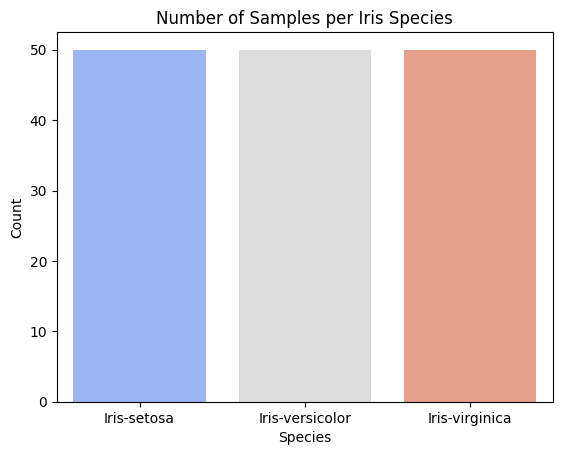

In [51]:
sns.countplot(x='Species', data=data, palette='coolwarm')
plt.title('Number of Samples per Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [52]:
# Split features and labels
X = data.drop('Id', axis=1).iloc[:, :-1]   # drop 'Id' and take all columns except last
y = data.iloc[:, -1]    # species column

# If labels are strings, map to integers (optional, but some models accept strings too)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)    # use y_encoded for models that need integers

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=500),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Fit models (use scaled X for those that need it)
for name, model in models.items():
    if name in ['KNN', 'LogisticRegression', 'SVM']:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    print(f"{name} trained")


KNN trained
LogisticRegression trained
DecisionTree trained
RandomForest trained
SVM trained



=== KNN ===
Accuracy: 0.933
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



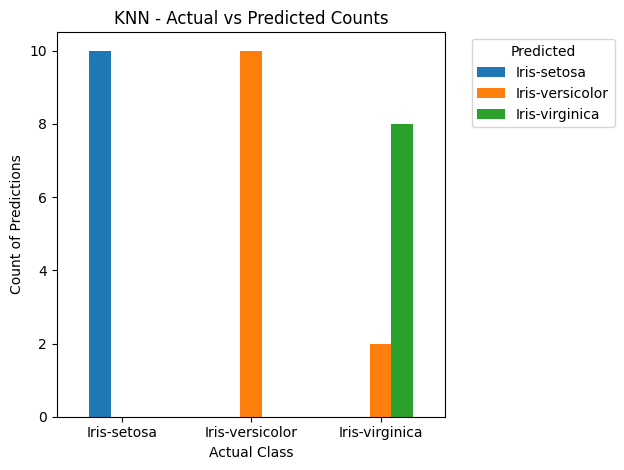


=== LogisticRegression ===
Accuracy: 0.933
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



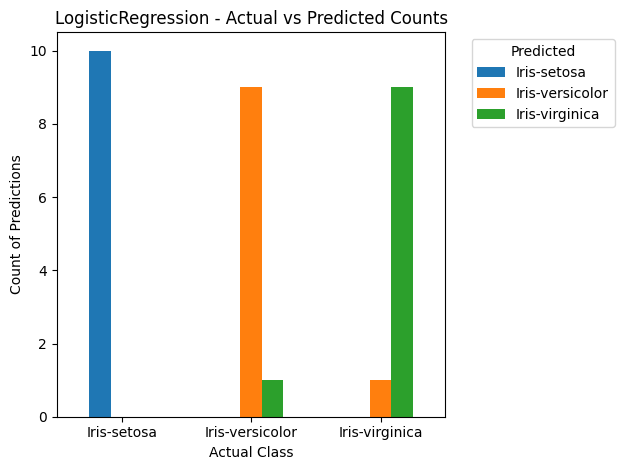


=== DecisionTree ===
Accuracy: 0.933
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



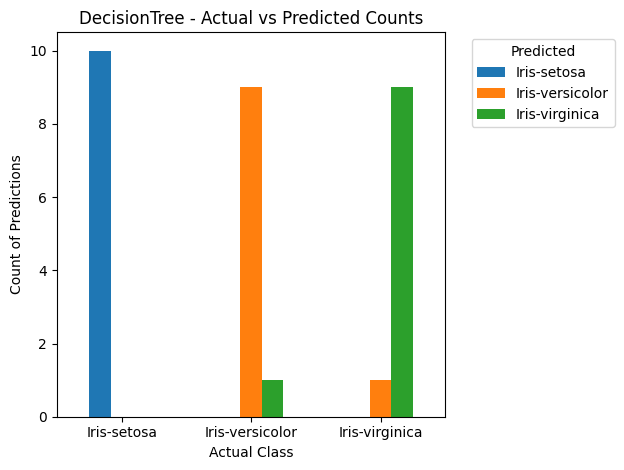


=== RandomForest ===
Accuracy: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



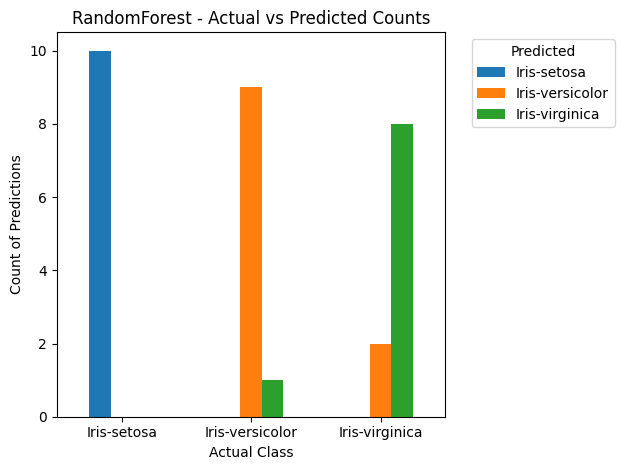


=== SVM ===
Accuracy: 0.967
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



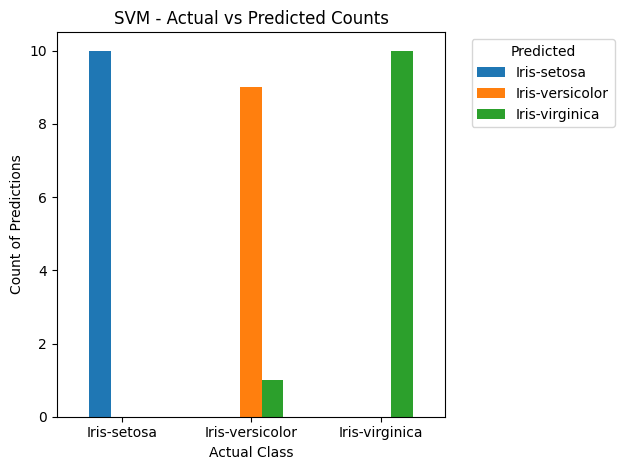

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    X_test_input = X_test_scaled if name in ['KNN','LogisticRegression','SVM'] else X_test
    y_pred = model.predict(X_test_input)

    # basic metrics
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # confusion matrix → DataFrame for plotting
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

    # plot bar chart
    cm_df.plot(kind='bar')
    plt.title(f"{name} - Actual vs Predicted Counts")
    plt.xlabel("Actual Class")
    plt.ylabel("Count of Predictions")
    plt.xticks(rotation=0)
    plt.legend(title="Predicted", bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [57]:
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    X_all = X_scaled = scaler.fit_transform(X) if name in ['KNN','LogisticRegression','SVM'] else X
    scores = cross_val_score(model, X_all, y_encoded, cv=5)
    print(f"{name} CV scores: {scores}, mean={scores.mean():.3f}")


KNN CV scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ], mean=0.960
LogisticRegression CV scores: [0.96666667 1.         0.93333333 0.9        1.        ], mean=0.960
DecisionTree CV scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ], mean=0.953
RandomForest CV scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ], mean=0.967
SVM CV scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ], mean=0.967


In [58]:
from sklearn.model_selection import GridSearchCV

# RandomForest tuning
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators':[50,100,200], 'max_depth':[None,5,10], 'min_samples_split':[2,5]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best RF:", rf_grid.best_params_, "Best score:", rf_grid.best_score_)

# KNN tuning
knn = KNeighborsClassifier()
knn_params = {'n_neighbors':[3,5,7,9], 'weights':['uniform','distance']}
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN:", knn_grid.best_params_, "Best score:", knn_grid.best_score_)


Best RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50} Best score: 0.95
Best KNN: {'n_neighbors': 5, 'weights': 'uniform'} Best score: 0.9666666666666668


In [59]:
best_model = rf_grid.best_estimator_   # or knn_grid.best_estimator_
# predict and evaluate on test
y_pred = best_model.predict(X_test if isinstance(best_model, RandomForestClassifier) else X_test_scaled)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Final Test Accuracy: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [60]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

y_bin = label_binarize(y_test, classes=[0,1,2])
y_score = best_model.predict_proba(X_test_scaled if hasattr(best_model, 'predict_proba') and best_model in ['KNN','LogisticRegression','SVM'] else X_test)
# compute ROC per class...

In [61]:
import joblib
from google.colab import drive
drive.mount('/content/drive')

# Save best model
joblib.dump(best_model, '/content/drive/MyDrive/iris_best_model.pkl')
# Save scaler and label encoder as well
joblib.dump(scaler, '/content/drive/MyDrive/iris_scaler.pkl')
joblib.dump(le, '/content/drive/MyDrive/label_encoder.pkl')
print("Saved model, scaler and label encoder to Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved model, scaler and label encoder to Drive.


In [62]:
import joblib

# Save model
joblib.dump(best_model, '/content/drive/MyDrive/iris_best_model.pkl')

print("✅ Model saved successfully to your Drive.")

✅ Model saved successfully to your Drive.


In [63]:
X = data.drop(['Species', 'Id'], axis=1, errors='ignore')
y = data['Species']

In [65]:
# Load the saved model
model = joblib.load('/content/drive/MyDrive/iris_best_model.pkl')

# Example: predict species for new sample
sample = [[5.1, 3.5, 1.4, 0.2]]  # [sepal length, sepal width, petal length, petal width]
prediction = model.predict(sample)
print("Predicted Species:", le.inverse_transform(prediction)[0])

Predicted Species: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
results = {
    "Best Model": "Random Forest",
    "Accuracy": round(accuracy_score(y_test, best_model.predict(X_test)), 3)
}
pd.DataFrame([results]).to_csv('/content/drive/MyDrive/iris_model_results.csv', index=False)
print("📄 Results saved to iris_model_results.csv")

📄 Results saved to iris_model_results.csv
